# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

In [1]:
# Install the necessary package
# Restart the kernel once after install this package
!python3 -m pip install opencv-python-headless==4.9.0.80 scikit-learn tqdm matplotlib requests

In [2]:
from sklearn.datasets import load_files
from tqdm import tqdm
import numpy as np
from glob import glob


# Define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = data["filenames"]
    return dog_files, data["target"]


# Load train, test, and validation datasets
train_files, train_targets = load_dataset("./dogImages/train")
valid_files, valid_targets = load_dataset("./dogImages/valid")
test_files, test_targets = load_dataset("./dogImages/test")

# Load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("./dogImages/train/*/"))]

# Print statistics about the dataset
print(f"There are {len(dog_names)} total dog categories.")
print(
    f"There are {len(train_files) + len(valid_files) + len(test_files)} total dog images."
)
print(f"There are {len(train_files)} training dog images.")
print(f"There are {len(valid_files)} validation dog images.")
print(f"There are {len(test_files)} test dog images.")

print(f"All classes in train dataset are: {np.unique(train_targets)}")
print(f"All classes in valid dataset are: {np.unique(valid_targets)}")
print(f"All classes in test dataset are: {np.unique(test_targets)}")

There are 133 total dog categories.
There are 8351 total dog images.
There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.
All classes in train dataset are: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132]
All classes in valid dataset are: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [3]:
import random

random.seed(8675309)

# Load filenames in shuffled human dataset
human_files = np.array(glob("./lfw/*/*"))
random.shuffle(human_files)

# Print statistics about the human dataset
print(f"There are {len(human_files)} total human images.")

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


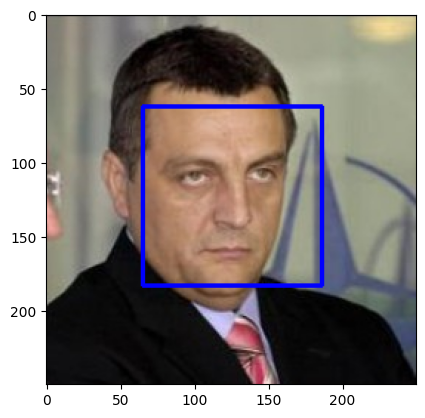

In [4]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt.xml")

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print("Number of faces detected:", len(faces))

# get bounding box for each detected face
for x, y, w, h in faces:
    # add bounding box to color image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ Percentage of human faces detected in human_files: 100% and in dog_files: 12%

In [6]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm
## on the images in human_files_short and dog_files_short.

human_rate_in_human_files = sum(face_detector(path) for path in tqdm(human_files_short))

human_rate_in_dog_files = sum(face_detector(path) for path in tqdm(dog_files_short))

print(
    f"Percentage of human faces detected in human_files: {human_rate_in_human_files}% and in dog_files: {human_rate_in_dog_files}%"
)

100%|██████████| 100/100 [00:04<00:00, 21.15it/s]

Percentage of human faces detected in human_files: 100% and in dog_files: 12%


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__: Deep learning models can be used to detect human faces in images that does not necessitate an image with a clearly presented face. I found that there are some open source models that can be used, one of them is serengil/deepface. Sometime the face which is painted on the wall or on the t-shirt can be detected as human face, so we could consider to some additional checks to make sure that the detected face is a real human face.

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [7]:
## (Optional) TODO: Report the performance of another
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [8]:
from torchvision.models import resnet50, ResNet50_Weights
# define ResNet50 model
ResNet50_model = resnet50(weights=ResNet50_Weights.DEFAULT)


### Pre-process the Data

Torchvision requires us to convert the images to a tensor. We will also need to normalize the images in the same manner as was done for the training of ResNet-50.  The following code cell does this for you.

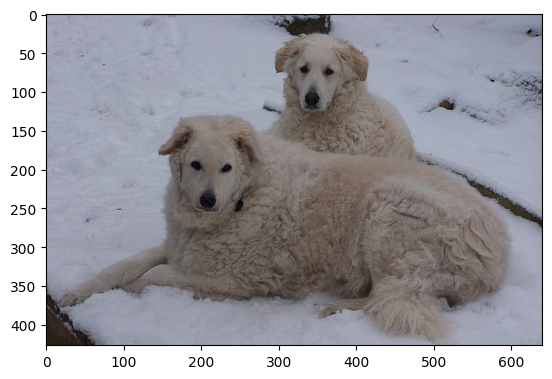

In [9]:
# Read image
img = cv2.imread(dog_files_short[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [10]:
# Transform image and convert to tensor

from torchvision import transforms
from PIL import Image

transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

tensor = transform(Image.fromarray(img)).unsqueeze(0)
print(f"Shape: {tensor.shape}")

Shape: torch.Size([1, 3, 224, 224])


### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [11]:
import torch


In [12]:
def preprocess_input(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return transform(Image.fromarray(img)).unsqueeze(0)

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    with torch.no_grad():
        tensor = preprocess_input(img_path)
        return ResNet50_model(tensor).argmax().item()

id = ResNet50_predict_labels(dog_files_short[2])

print(f"Predicted label: {dog_files_short[2]} - {id}")

Predicted label: ./dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg - 208


In [13]:
import requests

res = requests.get("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt")

classes = res.text.split("\n")

dog_classes = classes[151:268]

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

Since batch inference is faster than single inference, we will use the `ResNet50_predict_labels` function to predict the labels of all the images in the `dog_files_short` and `human_files_short` arrays.

In [14]:
def ResNet50_predict_batch(img_paths: list):
    # returns prediction vector for image located at img_path
    tensors = [preprocess_input(img_path) for img_path in tqdm(img_paths)]

    tensor = torch.cat(tensors, dim=0)

    with torch.no_grad():
        predicted_ids = ResNet50_model(tensor).argmax(dim=1).numpy()

    return predicted_ids


def dog_detector(img_paths):
    return sum(i >= 151 and i <= 268 for i in ResNet50_predict_batch(img_paths)) / len(img_paths)


output = ResNet50_predict_batch(dog_files_short[:10])

print(f"Predictions: {output}")

100%|██████████| 10/10 [00:00<00:00, 295.21it/s]


Predictions: [222 251 221 242 180 217 231 155 479 171]


### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__: Percentage of dog faces detected in human_files: 9.0% and in dog_files: 94.0%

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_rate_in_human_files = dog_detector(human_files_short)

dog_rate_in_dog_files = dog_detector(dog_files_short)

print(
    f"Percentage of dog faces detected in human_files: {dog_rate_in_human_files * 100}% and in dog_files: {dog_rate_in_dog_files * 100}%"
)

100%|██████████| 100/100 [00:00<00:00, 215.09it/s]


Percentage of dog faces detected in human_files: 9.0% and in dog_files: 94.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [16]:
class DogDataset(torch.utils.data.Dataset):
    """
    This is our custom dataset class which will load the images, perform transforms on them,
    and load their corresponding labels.
    """

    def __init__(self, img_paths, labels, transform=None):
        assert len(img_paths) == len(
            labels
        ), "The length of img_paths and labels must be the same"


        self.img_paths = img_paths
        self.labels = labels

        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise IndexError("Index out of range")
        img_path = self.img_paths[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform is not None:
            img = Image.fromarray(img)
            img = self.transform(img)

        return img, self.labels[idx]

94


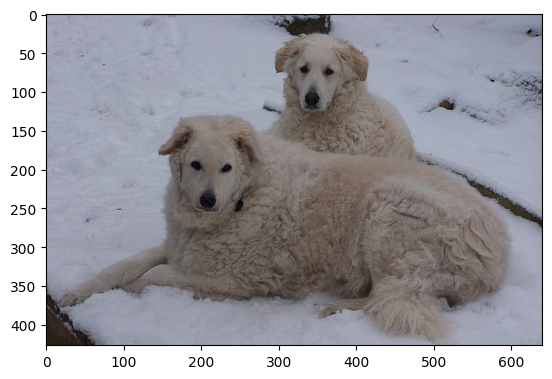

In [17]:
demo_dataset = DogDataset(train_files, train_targets)

img, label = demo_dataset[0]

plt.imshow(img)

print(label)


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed. Since the original dataset is quite small, it is suggested that we start with a small network. We will use the following CNN architecture:

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__: The architecture which is used in the above image is a good starting point for the image classification task. I have implemented an architecture which is similar to the above image. The architecture consists of 6 convolutional layers with max pooling and dropout layers. The convolutional layers are used to extract the features from the images and max pooling layers are used to reduce the spatial dimensions of the output volume. The dropout layers are used to prevent overfitting. The final layer is a dense layer with 133 nodes which is equal to the number of dog breeds in the dataset. The activation function used in the convolutional layers is relu and in the final layer is softmax.

I think that the above architecture should work well for the image classification task because it is a good starting point for the image classification task. Nowaday, CNN is widely used in image classification tasks and it is a good choice to start with a simple architecture and then improve it by adding more layers or changing the hyperparameters. By using convolutional layers, we can extract the features from the images and by combining them with other layers, we can using extracted features to classify the images.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc1 = nn.Linear(1024* 3* 3, 512)
        self.fc2 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


model = CNNModel()

with torch.no_grad():
    output = model(torch.randn(1, 3, 224, 224))

output.shape

torch.Size([1, 133])

In [19]:
with torch.no_grad():
    output = model(tensor)
    print(f"Output shape: {output.shape}")

Output shape: torch.Size([1, 133])


### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [21]:
import torch.optim as optim
from pathlib import Path
from torch.utils.tensorboard import SummaryWriter
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import trange



In [22]:
CHECKPOINT_DIR = Path("checkpoints")
CHECKPOINT_DIR.mkdir(exist_ok=True)

writer = SummaryWriter()


In [23]:
# Assuming model, DogDataset, train_files, train_targets, valid_files, valid_targets, transform, device, and CHECKPOINT_DIR are defined

criterion = nn.CrossEntropyLoss()

model = model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

train_loader = DataLoader(
    DogDataset(train_files, train_targets, transform=transform),
    batch_size=256,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

val_loader = DataLoader(
    DogDataset(valid_files, valid_targets, transform=transform),
    batch_size=256,
    shuffle=False,
    pin_memory=True,
    num_workers=4,
)


def train(model, criterion, optimizer, train_loader, val_loader, n_epochs=10):
    model.to(device)
    best_val_acc = 0.0

    for epoch in trange(n_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = correct / total

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), CHECKPOINT_DIR / "best.pth")

        print(
            f"Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
        )

        # Early stopping

        writer.add_scalar("Loss/train", train_loss, epoch)
        writer.add_scalar("Loss/val", val_loss, epoch)
        writer.add_scalar("Accuracy/val", val_acc, epoch)

        torch.save(
            model.state_dict(),
            CHECKPOINT_DIR / f"epoch_{epoch}_val_acc_{val_acc:.4f}.pth",
        )

    writer.close()

In [24]:
train(model, criterion, optimizer, train_loader, val_loader, n_epochs=20)

torch.save(model.state_dict(), "model.pth")

  5%|▌         | 1/20 [00:18<05:50, 18.43s/it]

Epoch: 1, Train Loss: 5.1753, Val Loss: 4.8897, Val Acc: 0.0132


Premature end of JPEG file
 10%|█         | 2/20 [00:35<05:22, 17.91s/it]

Epoch: 2, Train Loss: 4.8894, Val Loss: 4.8855, Val Acc: 0.0120


Premature end of JPEG file
 15%|█▌        | 3/20 [00:53<05:00, 17.70s/it]

Epoch: 3, Train Loss: 4.8785, Val Loss: 4.8720, Val Acc: 0.0192


Premature end of JPEG file
 20%|██        | 4/20 [01:11<04:45, 17.82s/it]

Epoch: 4, Train Loss: 4.8595, Val Loss: 4.8549, Val Acc: 0.0228


Premature end of JPEG file
 25%|██▌       | 5/20 [01:29<04:27, 17.80s/it]

Epoch: 5, Train Loss: 4.8202, Val Loss: 4.7751, Val Acc: 0.0251


Premature end of JPEG file
 30%|███       | 6/20 [01:46<04:09, 17.80s/it]

Epoch: 6, Train Loss: 4.7877, Val Loss: 4.7015, Val Acc: 0.0216


Premature end of JPEG file
 35%|███▌      | 7/20 [02:04<03:48, 17.60s/it]

Epoch: 7, Train Loss: 4.7506, Val Loss: 4.6716, Val Acc: 0.0204


Premature end of JPEG file
 40%|████      | 8/20 [02:21<03:29, 17.49s/it]

Epoch: 8, Train Loss: 4.6955, Val Loss: 4.6041, Val Acc: 0.0240


Premature end of JPEG file
 45%|████▌     | 9/20 [02:39<03:12, 17.52s/it]

Epoch: 9, Train Loss: 4.6608, Val Loss: 4.6021, Val Acc: 0.0240


Premature end of JPEG file
 50%|█████     | 10/20 [02:56<02:56, 17.65s/it]

Epoch: 10, Train Loss: 4.6454, Val Loss: 4.5380, Val Acc: 0.0383


Premature end of JPEG file
 55%|█████▌    | 11/20 [03:14<02:38, 17.64s/it]

Epoch: 11, Train Loss: 4.6152, Val Loss: 4.5850, Val Acc: 0.0299


Premature end of JPEG file
 60%|██████    | 12/20 [03:32<02:20, 17.61s/it]

Epoch: 12, Train Loss: 4.5947, Val Loss: 4.4890, Val Acc: 0.0503


Premature end of JPEG file
 65%|██████▌   | 13/20 [03:50<02:03, 17.70s/it]

Epoch: 13, Train Loss: 4.5787, Val Loss: 4.4677, Val Acc: 0.0443


Premature end of JPEG file
 70%|███████   | 14/20 [04:07<01:45, 17.66s/it]

Epoch: 14, Train Loss: 4.5627, Val Loss: 4.4547, Val Acc: 0.0443


Premature end of JPEG file
 75%|███████▌  | 15/20 [04:25<01:28, 17.68s/it]

Epoch: 15, Train Loss: 4.5346, Val Loss: 4.4767, Val Acc: 0.0359


Premature end of JPEG file
 80%|████████  | 16/20 [04:42<01:10, 17.65s/it]

Epoch: 16, Train Loss: 4.5112, Val Loss: 4.3602, Val Acc: 0.0563


Premature end of JPEG file
 85%|████████▌ | 17/20 [05:00<00:52, 17.57s/it]

Epoch: 17, Train Loss: 4.5124, Val Loss: 4.3741, Val Acc: 0.0443


Premature end of JPEG file
 90%|█████████ | 18/20 [05:17<00:35, 17.50s/it]

Epoch: 18, Train Loss: 4.4669, Val Loss: 4.3774, Val Acc: 0.0443


Premature end of JPEG file
 95%|█████████▌| 19/20 [05:35<00:17, 17.64s/it]

Epoch: 19, Train Loss: 4.4788, Val Loss: 4.3093, Val Acc: 0.0635


Premature end of JPEG file
100%|██████████| 20/20 [05:53<00:00, 17.67s/it]

Epoch: 20, Train Loss: 4.4669, Val Loss: 4.3117, Val Acc: 0.0527


### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [25]:
# Evaluate the model on the test data

test_loader = DataLoader(
    DogDataset(test_files, test_targets, transform=transform),
    batch_size=256,
    shuffle=False,
    pin_memory=True,
    num_workers=4,
)

model.eval()

correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

test_acc = correct / len(test_loader.dataset)

print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.0610


---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### Model Architecture

With this model, I have use the backbone from resnet50 and replace the last layer with a dense layer with 133 nodes and softmax activation function. This approach is called transfer learning and it is used to improve the accuracy of the model.

About resnet50: ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

The overall architecture of the resnet50 model is as following diagram:

![resnet50](./images/resnet50.png)

Image source: https://blog.devgenius.io/resnet50-6b42934db431


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__: To create a CNN to classify dog breed by using transfer learning, I have used the following steps:

- Create a new pytorch model

- In this model init function, I have loaded the resnet50 model and replaced the last layer with a dense layer with 133 nodes and softmax activation function.

- To avoiding retraning the resnet50 backbone, I have set the requires_grad attribute to False for all the parameters of the resnet50 model except the last layer.

- In the forward function, I have passed the input image through the resnet50 model and then through the dense layer.

I think the architecture is suitable for the current problem as the resnet50 model has been trained on more than a million images from the ImageNet database and has learned rich feature representations for a wide range of images. The resnet50 model has an image input size of 224-by-224. The dense layer with 133 nodes and softmax activation function helps in classifying the images into 133 dog breeds.


In [26]:
class Resnet50Model(nn.Module):
    def __init__(self):
        super(Resnet50Model, self).__init__()
        self.resnet50 = resnet50(pretrained=True)
        self.resnet50.fc = nn.Linear(2048, 133)

        # Fzreezing the weights except the last layer

        for param in self.resnet50.parameters():
            param.requires_grad = False

        for param in self.resnet50.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet50(x)

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement.

To augment the training data, I have used the following transformations:

- RandomHorizontalFlip: Horizontally flip the image randomly with a probability of 0.5.
- RandomRotation: Rotate the image randomly by a given angle.


In [27]:
transfer_model = Resnet50Model()

augmented_tranform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


train_loader = DataLoader(
    DogDataset(train_files, train_targets, transform=augmented_tranform),
    batch_size=128,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

val_loader = DataLoader(
    DogDataset(valid_files, valid_targets, transform=transform),
    batch_size=128,
    shuffle=False,
    pin_memory=True,
    num_workers=4,
)

optimizer = optim.AdamW(transfer_model.parameters(), lr=0.001)
train(transfer_model, criterion, optimizer, train_loader, val_loader, n_epochs=50)

torch.save(transfer_model.state_dict(), "transfer_model.pth")

/home/niits/miniconda3/envs/udacity/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/niits/miniconda3/envs/udacity/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  2%|▏         | 1/50 [00:18<15:09, 18.56s/it]

Epoch: 1, Train Loss: 2.7804, Val Loss: 1.3540, Val Acc: 0.7281


Premature end of JPEG file
  4%|▍         | 2/50 [00:37<15:03, 18.81s/it]

Epoch: 2, Train Loss: 0.9644, Val Loss: 0.8753, Val Acc: 0.7701


Premature end of JPEG file
  6%|▌         | 3/50 [00:56<14:48, 18.91s/it]

Epoch: 3, Train Loss: 0.6416, Val Loss: 0.7228, Val Acc: 0.8228


Premature end of JPEG file
  8%|▊         | 4/50 [01:15<14:28, 18.88s/it]

Epoch: 4, Train Loss: 0.5044, Val Loss: 0.6570, Val Acc: 0.8228


Premature end of JPEG file
 10%|█         | 5/50 [01:34<14:16, 19.02s/it]

Epoch: 5, Train Loss: 0.4307, Val Loss: 0.5920, Val Acc: 0.8287


Premature end of JPEG file
 12%|█▏        | 6/50 [01:53<13:53, 18.94s/it]

Epoch: 6, Train Loss: 0.3776, Val Loss: 0.5730, Val Acc: 0.8251


Premature end of JPEG file
 14%|█▍        | 7/50 [02:12<13:33, 18.91s/it]

Epoch: 7, Train Loss: 0.3399, Val Loss: 0.5518, Val Acc: 0.8228


Premature end of JPEG file
 16%|█▌        | 8/50 [02:31<13:13, 18.90s/it]

Epoch: 8, Train Loss: 0.3035, Val Loss: 0.5634, Val Acc: 0.8323


Premature end of JPEG file
 18%|█▊        | 9/50 [02:50<12:58, 19.00s/it]

Epoch: 9, Train Loss: 0.2809, Val Loss: 0.5059, Val Acc: 0.8371


Premature end of JPEG file
 20%|██        | 10/50 [03:08<12:33, 18.85s/it]

Epoch: 10, Train Loss: 0.2550, Val Loss: 0.5186, Val Acc: 0.8287


Premature end of JPEG file
 22%|██▏       | 11/50 [03:27<12:17, 18.92s/it]

Epoch: 11, Train Loss: 0.2314, Val Loss: 0.5056, Val Acc: 0.8431


Premature end of JPEG file
 24%|██▍       | 12/50 [03:46<11:55, 18.83s/it]

Epoch: 12, Train Loss: 0.2249, Val Loss: 0.5306, Val Acc: 0.8251


Premature end of JPEG file
 26%|██▌       | 13/50 [04:05<11:34, 18.78s/it]

Epoch: 13, Train Loss: 0.2039, Val Loss: 0.5193, Val Acc: 0.8299


Premature end of JPEG file
 28%|██▊       | 14/50 [04:24<11:18, 18.85s/it]

Epoch: 14, Train Loss: 0.1879, Val Loss: 0.4683, Val Acc: 0.8467


Premature end of JPEG file
 30%|███       | 15/50 [04:43<11:00, 18.88s/it]

Epoch: 15, Train Loss: 0.1764, Val Loss: 0.4989, Val Acc: 0.8263


Premature end of JPEG file
 32%|███▏      | 16/50 [05:02<10:43, 18.92s/it]

Epoch: 16, Train Loss: 0.1668, Val Loss: 0.4664, Val Acc: 0.8371


Premature end of JPEG file
 34%|███▍      | 17/50 [05:21<10:23, 18.89s/it]

Epoch: 17, Train Loss: 0.1499, Val Loss: 0.5074, Val Acc: 0.8395


Premature end of JPEG file
 36%|███▌      | 18/50 [05:40<10:06, 18.94s/it]

Epoch: 18, Train Loss: 0.1564, Val Loss: 0.4777, Val Acc: 0.8539


Premature end of JPEG file
 38%|███▊      | 19/50 [05:58<09:46, 18.91s/it]

Epoch: 19, Train Loss: 0.1388, Val Loss: 0.4575, Val Acc: 0.8431


Premature end of JPEG file
 40%|████      | 20/50 [06:17<09:26, 18.87s/it]

Epoch: 20, Train Loss: 0.1405, Val Loss: 0.4798, Val Acc: 0.8359


Premature end of JPEG file
 42%|████▏     | 21/50 [06:36<09:04, 18.79s/it]

Epoch: 21, Train Loss: 0.1341, Val Loss: 0.4690, Val Acc: 0.8443


Premature end of JPEG file
 44%|████▍     | 22/50 [06:55<08:47, 18.85s/it]

Epoch: 22, Train Loss: 0.1201, Val Loss: 0.4646, Val Acc: 0.8563


Premature end of JPEG file
 46%|████▌     | 23/50 [07:14<08:29, 18.88s/it]

Epoch: 23, Train Loss: 0.1179, Val Loss: 0.4804, Val Acc: 0.8503


Premature end of JPEG file
 48%|████▊     | 24/50 [07:33<08:12, 18.95s/it]

Epoch: 24, Train Loss: 0.1166, Val Loss: 0.4757, Val Acc: 0.8527


Premature end of JPEG file
 50%|█████     | 25/50 [07:52<07:51, 18.87s/it]

Epoch: 25, Train Loss: 0.1177, Val Loss: 0.4854, Val Acc: 0.8371


Premature end of JPEG file
 52%|█████▏    | 26/50 [08:11<07:33, 18.91s/it]

Epoch: 26, Train Loss: 0.1106, Val Loss: 0.4724, Val Acc: 0.8395


Premature end of JPEG file
 54%|█████▍    | 27/50 [08:30<07:15, 18.95s/it]

Epoch: 27, Train Loss: 0.1048, Val Loss: 0.4747, Val Acc: 0.8407


Premature end of JPEG file
 56%|█████▌    | 28/50 [08:49<06:56, 18.93s/it]

Epoch: 28, Train Loss: 0.0970, Val Loss: 0.4754, Val Acc: 0.8563


Premature end of JPEG file
 58%|█████▊    | 29/50 [09:08<06:39, 19.00s/it]

Epoch: 29, Train Loss: 0.0912, Val Loss: 0.4828, Val Acc: 0.8383


Premature end of JPEG file
 60%|██████    | 30/50 [09:27<06:20, 19.01s/it]

Epoch: 30, Train Loss: 0.0886, Val Loss: 0.4503, Val Acc: 0.8467


Premature end of JPEG file
 62%|██████▏   | 31/50 [09:46<06:04, 19.16s/it]

Epoch: 31, Train Loss: 0.0787, Val Loss: 0.4716, Val Acc: 0.8467


Premature end of JPEG file
 64%|██████▍   | 32/50 [10:05<05:44, 19.16s/it]

Epoch: 32, Train Loss: 0.0791, Val Loss: 0.4513, Val Acc: 0.8563


Premature end of JPEG file
 66%|██████▌   | 33/50 [10:24<05:24, 19.07s/it]

Epoch: 33, Train Loss: 0.0852, Val Loss: 0.4601, Val Acc: 0.8515


Premature end of JPEG file
 68%|██████▊   | 34/50 [10:43<05:04, 19.01s/it]

Epoch: 34, Train Loss: 0.0800, Val Loss: 0.4836, Val Acc: 0.8515


Premature end of JPEG file
 70%|███████   | 35/50 [11:02<04:44, 18.98s/it]

Epoch: 35, Train Loss: 0.0817, Val Loss: 0.4665, Val Acc: 0.8515


Premature end of JPEG file
 72%|███████▏  | 36/50 [11:21<04:26, 19.01s/it]

Epoch: 36, Train Loss: 0.0785, Val Loss: 0.4866, Val Acc: 0.8419


Premature end of JPEG file
 74%|███████▍  | 37/50 [11:40<04:06, 19.00s/it]

Epoch: 37, Train Loss: 0.0739, Val Loss: 0.4880, Val Acc: 0.8443


Premature end of JPEG file
 76%|███████▌  | 38/50 [11:59<03:48, 19.01s/it]

Epoch: 38, Train Loss: 0.0757, Val Loss: 0.4834, Val Acc: 0.8443


Premature end of JPEG file
 78%|███████▊  | 39/50 [12:18<03:28, 18.95s/it]

Epoch: 39, Train Loss: 0.0745, Val Loss: 0.4988, Val Acc: 0.8539


Premature end of JPEG file
 80%|████████  | 40/50 [12:37<03:08, 18.86s/it]

Epoch: 40, Train Loss: 0.0682, Val Loss: 0.5178, Val Acc: 0.8419


Premature end of JPEG file
 82%|████████▏ | 41/50 [12:55<02:49, 18.85s/it]

Epoch: 41, Train Loss: 0.0744, Val Loss: 0.5082, Val Acc: 0.8335


Premature end of JPEG file
 84%|████████▍ | 42/50 [13:14<02:30, 18.87s/it]

Epoch: 42, Train Loss: 0.0674, Val Loss: 0.5022, Val Acc: 0.8443


Premature end of JPEG file
 86%|████████▌ | 43/50 [13:33<02:12, 18.86s/it]

Epoch: 43, Train Loss: 0.0660, Val Loss: 0.4925, Val Acc: 0.8527


Premature end of JPEG file
 88%|████████▊ | 44/50 [13:52<01:53, 18.90s/it]

Epoch: 44, Train Loss: 0.0663, Val Loss: 0.4933, Val Acc: 0.8395


Premature end of JPEG file
 90%|█████████ | 45/50 [14:12<01:35, 19.05s/it]

Epoch: 45, Train Loss: 0.0651, Val Loss: 0.4980, Val Acc: 0.8479


Premature end of JPEG file
 92%|█████████▏| 46/50 [14:31<01:16, 19.10s/it]

Epoch: 46, Train Loss: 0.0649, Val Loss: 0.4725, Val Acc: 0.8587


Premature end of JPEG file
 94%|█████████▍| 47/50 [14:50<00:57, 19.01s/it]

Epoch: 47, Train Loss: 0.0590, Val Loss: 0.4922, Val Acc: 0.8539


Premature end of JPEG file
 96%|█████████▌| 48/50 [15:09<00:37, 19.00s/it]

Epoch: 48, Train Loss: 0.0556, Val Loss: 0.4974, Val Acc: 0.8419


Premature end of JPEG file
 98%|█████████▊| 49/50 [15:27<00:18, 18.97s/it]

Epoch: 49, Train Loss: 0.0556, Val Loss: 0.4757, Val Acc: 0.8539


Premature end of JPEG file
100%|██████████| 50/50 [15:46<00:00, 18.93s/it]

Epoch: 50, Train Loss: 0.0600, Val Loss: 0.5084, Val Acc: 0.8419


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [28]:
test_loader = DataLoader(
    DogDataset(test_files, test_targets, transform=transform),
    batch_size=128,
    shuffle=False,
    pin_memory=True,
    num_workers=4,
)

transfer_model.load_state_dict(torch.load("transfer_model.pth"))

transfer_model.to(device)


transfer_model.eval()

correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = transfer_model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

test_acc = correct / len(test_loader.dataset)

print(f"Test accuracy: {test_acc:.4f}")


/tmp/ipykernel_39205/3498337040.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  transfer_model.load_state_dict(torch.load("transfer_model.pth"))


Test accuracy: 0.8313


In [29]:
dog_names

['1.Affenpinscher',
 '2.Afghan_hound',
 '3.Airedale_terrier',
 '4.Akita',
 '5.Alaskan_malamute',
 '6.American_eskimo_dog',
 '7.American_foxhound',
 '8.American_staffordshire_terrier',
 '9.American_water_spaniel',
 '0.Anatolian_shepherd_dog',
 '1.Australian_cattle_dog',
 '2.Australian_shepherd',
 '3.Australian_terrier',
 '4.Basenji',
 '5.Basset_hound',
 '6.Beagle',
 '7.Bearded_collie',
 '8.Beauceron',
 '9.Bedlington_terrier',
 '0.Belgian_malinois',
 '1.Belgian_sheepdog',
 '2.Belgian_tervuren',
 '3.Bernese_mountain_dog',
 '4.Bichon_frise',
 '5.Black_and_tan_coonhound',
 '6.Black_russian_terrier',
 '7.Bloodhound',
 '8.Bluetick_coonhound',
 '9.Border_collie',
 '0.Border_terrier',
 '1.Borzoi',
 '2.Boston_terrier',
 '3.Bouvier_des_flandres',
 '4.Boxer',
 '5.Boykin_spaniel',
 '6.Briard',
 '7.Brittany',
 '8.Brussels_griffon',
 '9.Bull_terrier',
 '0.Bulldog',
 '1.Bullmastiff',
 '2.Cairn_terrier',
 '3.Canaan_dog',
 '4.Cane_corso',
 '5.Cardigan_welsh_corgi',
 '6.Cavalier_king_charles_spaniel',
 '

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_model(image_path, top_k=5):
    img = cv2.imread(image_path)

    if img is None:
        raise ValueError("Invalid image path")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tensor = transform(Image.fromarray(img)).unsqueeze(0).to(device)

    transfer_model.eval()

    with torch.no_grad():
        output = transfer_model(tensor)
        predicted = torch.argmax(torch.tensor(output), dim=1).cpu().numpy()

    return predicted


def predict(image_path):
    if face_detector(img_path=image_path):
        related_breeds = [
            dog_names[i] for i in run_model(image_path=image_path, top_k=5)
        ]
        return f"Human detected in image, he/she looks like some breeds of dogs: {related_breeds}"
    elif dog_detector(img_paths=[image_path]):
        predicted_id = run_model(image_path=image_path, top_k=1)[0]
        return f"Dog detected in image, the breed is: {dog_names[predicted_id]}"
    else:
        return f"Neither human nor dog detected in image"

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ By using the transfer learning model, the output is better than I expected. The model has predicted the dog breeds accurately for the images that I have tested. When providing the images of cats, the model has predicted that neither a dog nor a human is detected in the image. The model has also predicted the dog breeds accurately for the images of humans.

Three possible points of improvement for the algorithm are:

- Sometimes the face which is painted on the wall or on the t-shirt can be detected as human face, so we could consider to some additional checks to make sure that the detected face is a real human face.
- Provided image could contain multiple dogs, so we could consider to add a feature to detect multiple dogs in the image, it could be done by using object detection models.
- The model could be improved by using more data for training the model. The model could be trained on more images of dogs and humans to improve the accuracy of the model.

/tmp/ipykernel_39205/603908031.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted = torch.argmax(torch.tensor(output), dim=1).cpu().numpy()
100%|██████████| 1/1 [00:00<00:00, 299.38it/s]


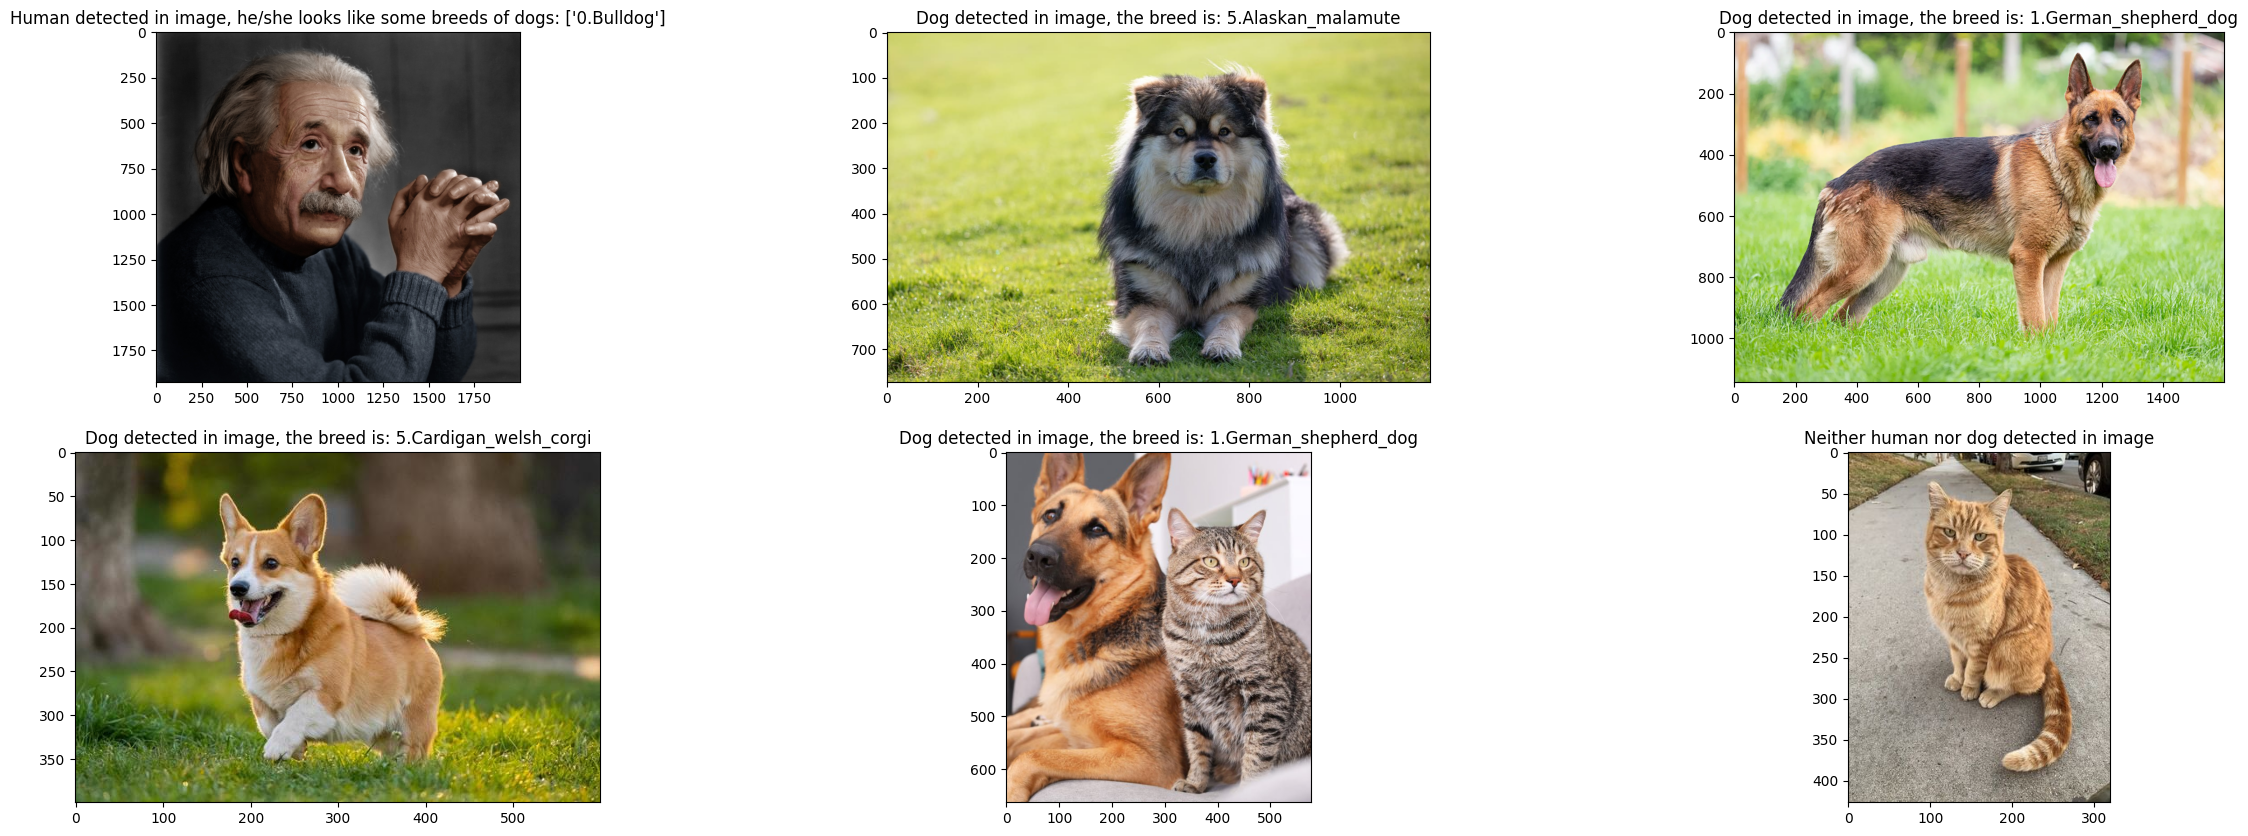

In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from pathlib import  Path


test_paths = list(Path("test_images").glob("*"))[:6]

# create subplots with 2 rows and 3 columns

fig, axes = plt.subplots(2, 3, figsize=(30, 10))

for i, image_path in enumerate(test_paths):

    img = cv2.imread(str(image_path))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i // 3, i % 3].imshow(img)

    axes[i // 3, i % 3].set_title(predict(image_path=str(image_path)))

plt.show()